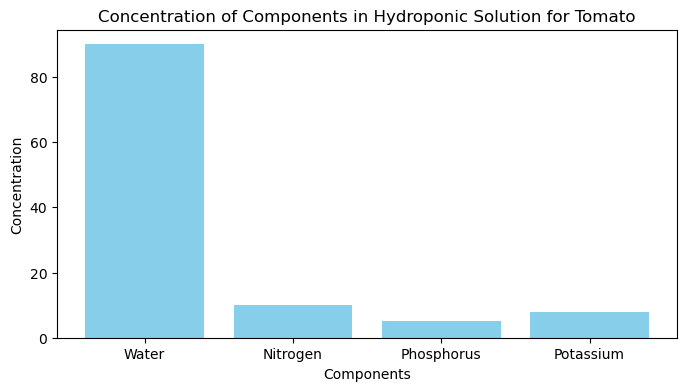

In [10]:
from reportlab.lib import colors
from reportlab.lib.pagesizes import letter
from reportlab.platypus import SimpleDocTemplate, Table, Paragraph, Spacer
from reportlab.lib.styles import getSampleStyleSheet, ParagraphStyle
import matplotlib.pyplot as plt
import numpy as np

def generate_report(
    plant_name: str,  # The name of the plant for which the hydroponic solution simulation is conducted.
    required_nutriments: dict,  # A dictionary containing the required nutriments for the specified plant.
    solution_composition: dict,  # A dictionary representing the composition of the hydroponic solution.
    solution_volume: float,  # The volume of the hydroponic solution in milliliters (mL).
    additional_info: str = None  # Additional information or notes about the simulation (optional).
) -> None:
    """
    Generates a lab report in PDF format based on the provided parameters.

    Args:
        plant_name: The name of the plant for which the hydroponic solution simulation is conducted.
        required_nutriments: A dictionary containing the required nutriments for the specified plant.
        solution_composition: A dictionary representing the composition of the hydroponic solution.
        solution_volume: The volume of the hydroponic solution in milliliters (mL).
        additional_info: Additional information or notes about the simulation (optional).

    Returns:
        None: a pdf is created in the folder of this file
    """
    # Create a PDF document
    doc = SimpleDocTemplate("hydroponic_report.pdf", pagesize=letter)
    story = []

    # Title
    title_style = getSampleStyleSheet()["Title"]
    title = Paragraph("Hydroponic Solution Simulation Report", title_style)
    story.append(title)
    story.append(Spacer(1, 12))

    # Summary
    summary_style = getSampleStyleSheet()["Normal"]
    summary_text = f"This report summarizes the simulation for {plant_name} in a hydroponic solution."
    story.append(Paragraph(summary_text, summary_style))
    story.append(Spacer(1, 12))

    # Plant Information
    plant_info_style = getSampleStyleSheet()["Heading2"]
    plant_info_text = f"Plant: {plant_name}"
    story.append(Paragraph(plant_info_text, plant_info_style))
    story.append(Spacer(1, 6))
    nutriments_table_data = [['Nutrient', 'Required Amount']]
    for nutrient, amount in required_nutriments.items():
        nutriments_table_data.append([nutrient, str(amount)])
    nutriments_table = Table(nutriments_table_data)
    story.append(nutriments_table)
    story.append(Spacer(1, 36))

    # Solution Composition
    solution_comp_style = getSampleStyleSheet()["Heading2"]
    solution_comp_text = "Solution Composition:"
    story.append(Paragraph(solution_comp_text, solution_comp_style))
    story.append(Spacer(1, 6))
    solution_table_data = [['Component', 'Concentration']]
    for component, conc in solution_composition.items():
        solution_table_data.append([component, str(conc)])
    solution_table = Table(solution_table_data)
    story.append(solution_table)
    story.append(Spacer(1, 48))

    # Additional Information
    if additional_info:
        add_info_style = getSampleStyleSheet()["Heading2"]
        add_info_text = "Additional Information:"
        story.append(Paragraph(add_info_text, add_info_style))
        story.append(Spacer(1, 6))
        story.append(Paragraph(additional_info, summary_style))
        story.append(Spacer(1, 12))

    # Generate Graph
    plot_graph(plant_name, solution_composition, solution_volume)

    # Add the graph to the report
    graph = "hydroponic_graph.png"
    story.append(Paragraph("Graph:", solution_comp_style))
    story.append(Spacer(1, 6))
    story.append(Paragraph("", summary_style))
    story.append(Spacer(1, 12))
    story.append(Paragraph(f'<img src="{graph}" width="400" height="200"/>', summary_style))
    story.append(Spacer(1, 12))

    # Build the PDF
    doc.build(story)

def plot_graph(plant_name, solution_composition, solution_volume):
    # Generate data for plotting
    components = list(solution_composition.keys())
    concentrations = list(solution_composition.values())
    volume = solution_volume

    # Plot
    plt.figure(figsize=(8, 4))
    plt.bar(components, concentrations, color='skyblue')
    plt.xlabel('Components')
    plt.ylabel('Concentration')
    plt.title(f'Concentration of Components in Hydroponic Solution for {plant_name}')
    plt.savefig("hydroponic_graph.png")

# Example usage
if __name__ == "__main__":
    plant_name = "Tomato"
    required_nutriments = {"Nitrogen": 50, "Phosphorus": 30, "Potassium": 70}
    solution_composition = {"Water": 90, "Nitrogen": 10, "Phosphorus": 5, "Potassium": 8}
    solution_volume = 1000  # mL
    additional_info = "Simulation conducted at room temperature."
    generate_report(plant_name, required_nutriments, solution_composition, solution_volume, additional_info)
